In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.preprocessing import LabelEncoder

In [2]:
data = pd.read_csv("Housing.csv")


In [3]:
data.head(2)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished


In [4]:
data.info()
#basic info about dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [5]:
data.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [6]:
data.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')

In [7]:
data.dtypes

price                int64
area                 int64
bedrooms             int64
bathrooms            int64
stories              int64
mainroad            object
guestroom           object
basement            object
hotwaterheating     object
airconditioning     object
parking              int64
prefarea            object
furnishingstatus    object
dtype: object

In [8]:
data.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [9]:
data.count()

price               545
area                545
bedrooms            545
bathrooms           545
stories             545
mainroad            545
guestroom           545
basement            545
hotwaterheating     545
airconditioning     545
parking             545
prefarea            545
furnishingstatus    545
dtype: int64

In [10]:
data.dropna(inplace=True)

In [11]:
data.count()

price               545
area                545
bedrooms            545
bathrooms           545
stories             545
mainroad            545
guestroom           545
basement            545
hotwaterheating     545
airconditioning     545
parking             545
prefarea            545
furnishingstatus    545
dtype: int64

In [12]:
duplicate_rows_df = data[data.duplicated()]
print("number of duplicate rows :", duplicate_rows_df.shape)

number of duplicate rows : (0, 13)


In [13]:
data.count()

price               545
area                545
bedrooms            545
bathrooms           545
stories             545
mainroad            545
guestroom           545
basement            545
hotwaterheating     545
airconditioning     545
parking             545
prefarea            545
furnishingstatus    545
dtype: int64

In [14]:
features = data.columns
features


Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')

In [15]:
Zero_vals_cols = (data[features]==0).sum()
Zero_vals_cols


price                 0
area                  0
bedrooms              0
bathrooms             0
stories               0
mainroad              0
guestroom             0
basement              0
hotwaterheating       0
airconditioning       0
parking             299
prefarea              0
furnishingstatus      0
dtype: int64

In [16]:
data.isnull() / len(data) * 100

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
541,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
542,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
543,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [17]:
data[["price","area"]] = data[["price","area"]].replace(0,np.NaN)
data.area.fillna(data.area.median() , inplace=True)

In [18]:
one_hot_encoded = pd.get_dummies(data , columns=['mainroad'], prefix = ['mainroad'])
one_hot_encoded

,price,area,bedrooms,bathrooms,stories,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,mainroad_no,mainroad_yes
0,13300000,7420,4,2,3,no,no,no,yes,2,yes,furnished,False,True
1,12250000,8960,4,4,4,no,no,no,yes,3,no,furnished,False,True
2,12250000,9960,3,2,2,no,yes,no,no,2,yes,semi-furnished,False,True
3,12215000,7500,4,2,2,no,yes,no,yes,3,yes,furnished,False,True
4,11410000,7420,4,1,2,yes,yes,no,yes,2,no,furnished,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,no,yes,no,no,2,no,unfurnished,False,True
541,1767150,2400,3,1,1,no,no,no,no,0,no,semi-furnished,True,False
542,1750000,3620,2,1,1,no,no,no,no,0,no,unfurnished,False,True
543,1750000,2910,3,1,1,no,no,no,no,0,no,furnished,True,False


In [19]:
label_encoder = LabelEncoder()
data['Guestroom_LabelEncoded'] = label_encoder.fit_transform(data['guestroom'])
data

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,Guestroom_LabelEncoded
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished,0
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished,0
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished,0
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished,0
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished,0
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished,0
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished,0
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished,0


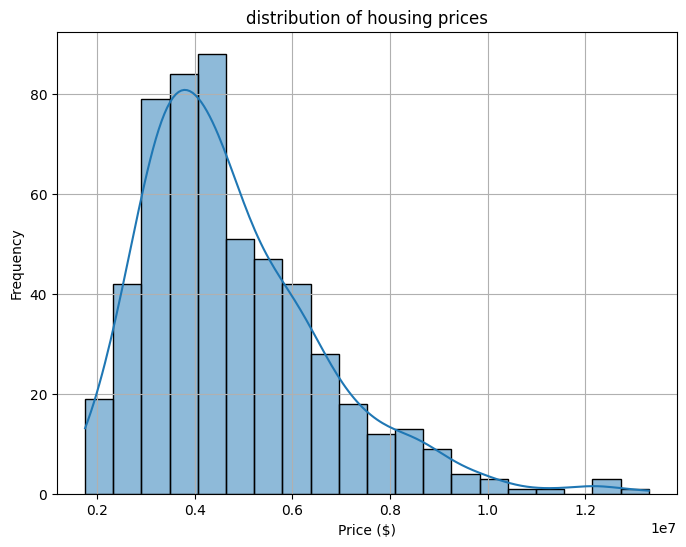

In [20]:
plt.figure(figsize=(8,6))
sns.histplot(data['price'],bins = 20 , kde = True)
plt.title("distribution of housing prices")
plt.xlabel("Price ($)")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

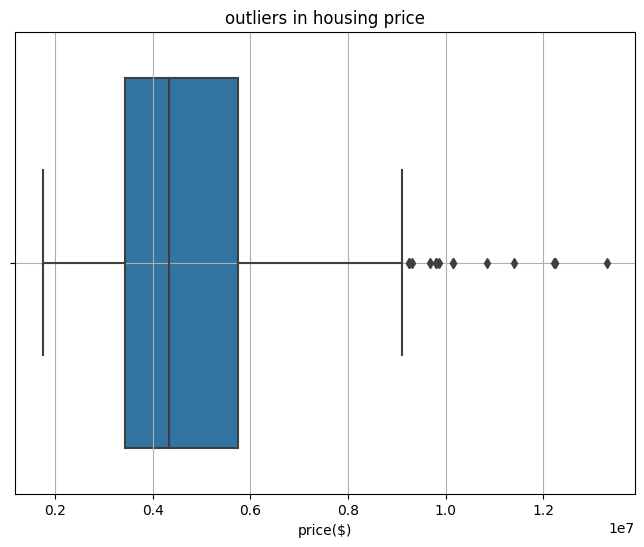

In [21]:
plt.figure(figsize = (8,6))
sns.boxplot(data = data , x ='price')
plt.title("outliers in housing price")
plt.xlabel("price($)")
plt.grid(True)
plt.show()


In [22]:
data = data[data["price"] < 90000000]

In [23]:
def find_boundaries(variable):
  q1=data[variable].quantile(0.25)
  q3=data[variable].quantile(0.75)
  iqr=q3-q1
  lower_b=q1-1.5*iqr
  upper_b=q1+1.5*iqr
  return lower_b, upper_b
lower_p, upper_p = find_boundaries('price')

data.price = np.where(data.price> upper_p,upper_p,data.price)
data.price = np.where(data.price< lower_p,lower_p,data.price)

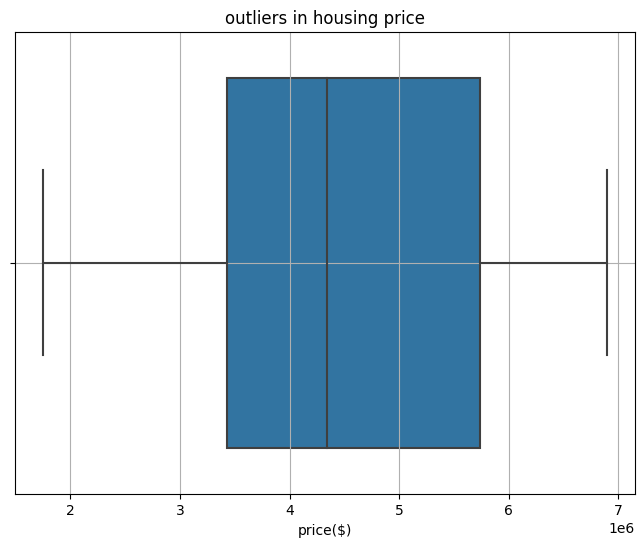

In [24]:
plt.figure(figsize = (8,6))
sns.boxplot(data = data , x ='price')
plt.title("outliers in housing price")
plt.xlabel("price($)")
plt.grid(True)
plt.show()


In [28]:
correlation_matrix = data.corr(numeric_only = True)

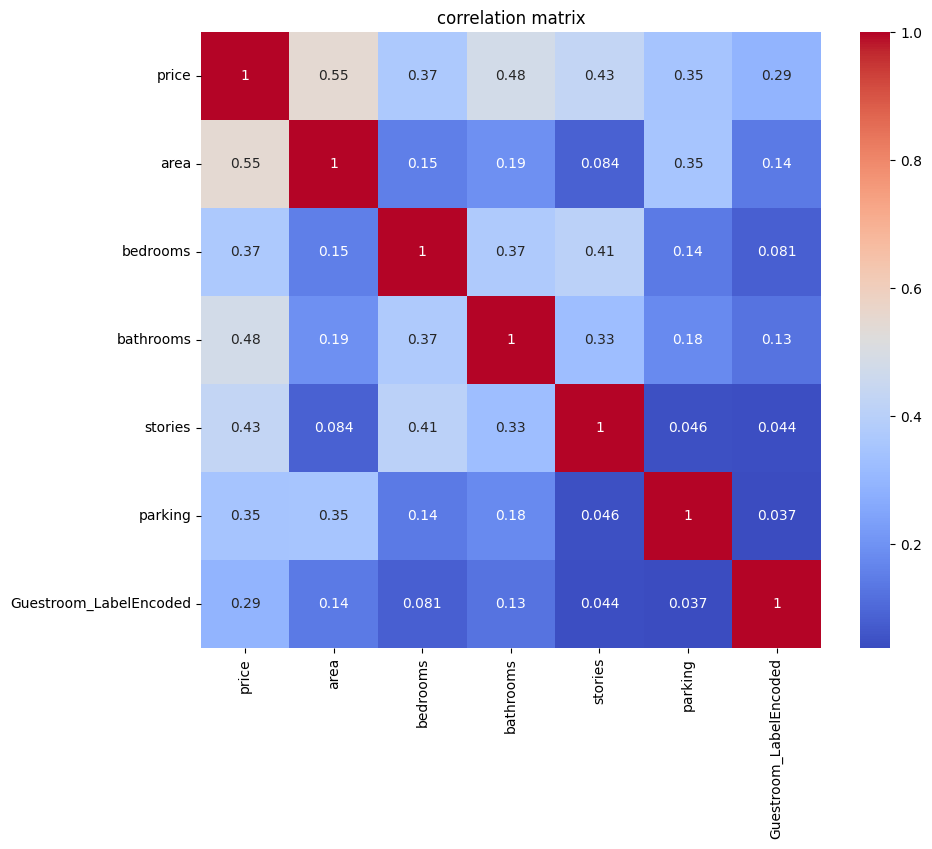

In [29]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("correlation matrix")
plt.show()

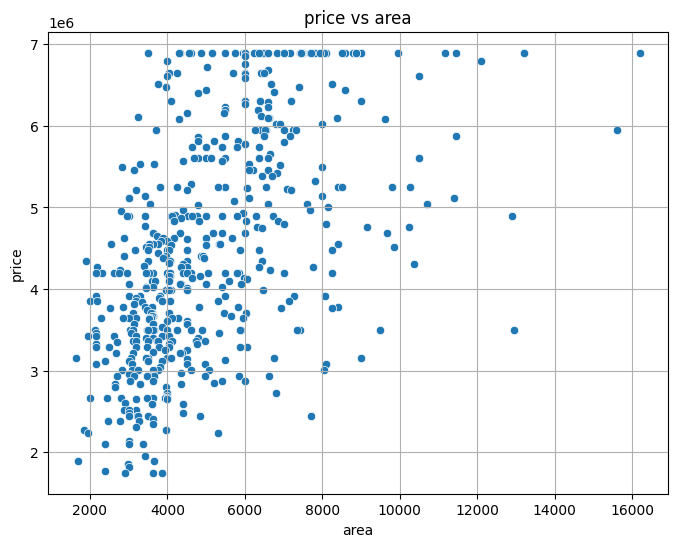

In [30]:
plt.figure(figsize=(8,6))
sns.scatterplot(data = data , x = 'area' , y = 'price')
plt.title("price vs area")
plt.xlabel("area")
plt.ylabel("price")
plt.grid(True)
plt.show()

In [34]:
from sklearn.model_selection import train_test_split

X = data['area']
y = data['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # random_state=42 for reproducibility

# create 'errors_product()' and 'squared_errors()' functions
def errors_product():
    prod = (X_train - X_train.mean()) * (y_train - y_train.mean())
    return prod

def squared_errors():
    sq_errors = (X_train - X_train.mean()) ** 2
    return sq_errors

# calculate slope and intercept
slope = errors_product().sum() / squared_errors().sum()
intercept = y_train.mean() - (slope * X_train.mean())

print("slope: ", slope)
print(f"intercept:{intercept}")

slope:  346.335557692831
intercept:2752983.5101003814


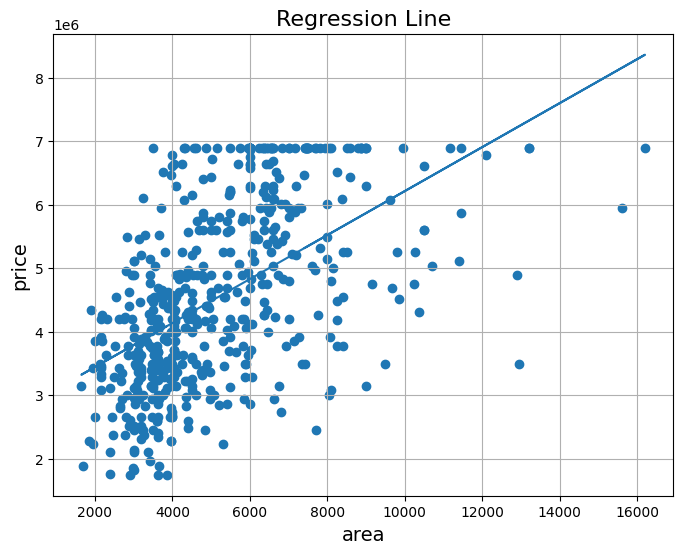

In [36]:
# plot the regression line in the scatter plot between relative humidity and apparent temperature
plt.figure(figsize=(8, 6))
plt.scatter(data["area"], data["price"])
plt.title("Regression Line", fontsize=16)
plt.xlabel("area", fontsize=14)
plt.ylabel("price", fontsize=14)
plt.grid(True)
plt.plot(data["area"], (slope * data["area"] + intercept))